# Controlling a seven-segment display from the Raspberry Pi - Part 1

A *seven-segment display* (SSD), is a form of electronic display device for displaying decimal numerals. They are widely used in digital clocks, electronic meters, and other electronic devices for displaying numerical information.

The seven elements of the display can be lit in different combinations to represent the Arabic numerals. The seven segments are arranged as a rectangle of two vertical segments on each side with one horizontal segment on the top, middle, and bottom. Additionally, the seventh segment bisects the rectangle horizontally. The segments of a 7-segment display are referred to by the letters A to G, where the optional DP decimal point (an *eighth segment*) is used for the display of non-integer numbers.

<center>
    <figure align="center">
        <img src="https://upload.wikimedia.org/wikipedia/commons/0/02/7_segment_display_labeled.svg" width="250">
        <figcaption>
            Labelled segments of 7-segment display — <a href="https://commons.wikimedia.org/wiki/File:7_segment_display_labeled.svg">By user:h2g2bob [GFDL, CC-BY-SA-3.0, or CC BY-SA 2.5], from Wikimedia Commons</a><br/>
        </figcaption>
    </figure>
</center>

There are 128 different ouput that can be generated with a 7-segment display:

<center>
    <figure align="center">
        <img src="https://upload.wikimedia.org/wikipedia/commons/d/d1/7-segment.svg" width="500">
        <figcaption>
            Possible outputs of a 7-segment display — <a href="https://commons.wikimedia.org/wiki/File:7-segment.svg">[Public domain], from Wikimedia Commons</a><br/>
        </figcaption>
    </figure>
</center>

## The I<sup>2</sup>C bus

The HT16K33 7-segment display uses the I<sup>2</sup>C bus.  An I<sup>2</sup>C bus can support up to 256 different devices (e.g. sensors, motors, outputs) at the same time.  Each component has a unique hexadecimal address.  The HT16K33 generally uses a `0x70` address, but we'll verify that later.  The I<sup>2</sup>C bus uses only two GPIO pins:

Line | Purpose
-----|--------
SDA  | Data
SCL  | Clock

<center>The I<sup>2</sup>C bus lines</center>

## Digits

All the 10 decimal digits (and all 16 hexadecimal digits) can be represented in a 7-segment display:

Digit | Input
------|------
0|0x3F
1|0x06
2|0x5B
3|0x4F
4|0x66
5|0x6D
6|0x7D
7|0x07
8|0x7F
9|0x6F
A|0x77
B|0x7C
C|0x39
D|0x5E
E|0x79
F|0x71

<center>Displaying the hexadecimal digits 0 to F</center>

# Controlling the 4-digit 7-segment display

The four-digit seven-segment display that we are going to use has 4 pins (+, -, D, C).  The table below describes each pin, as well as how it should be connected to the Raspberry Pi:

<center>
    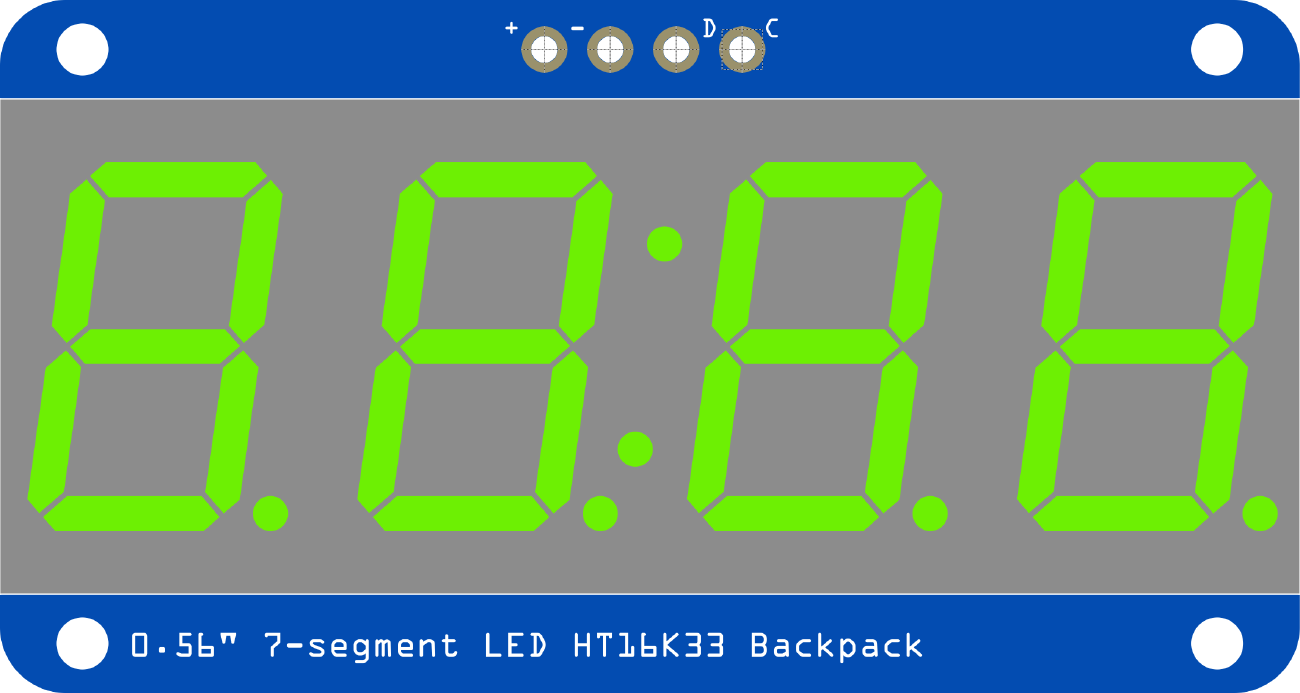<br/>
    Seven segment display
</center>

<br>

7-Segment Pin | Purpose | GPIO Pin
--------------|---------|---------
+|Power|3.3V
-|Ground|GND
D|SDA (Data for I<sup>2</sup>C)|SDA
C|SCL (Clock for I<sup>2</sup>C)|SCL

<center>
The I<sup>2</sup>C bus lines
</center>

## Download the support code

Adafruit, who makes the 7-segment display, has created a Python library for our display, which provides the `segments` class.  The library is preinstalled on the Pi, but you'll need to download the example code from GitHub.

Run the code below to download Adafruit_HT16K33 repo:

In [ ]:
!git clone https://github.com/adafruit/Adafruit_CircuitPython_HT16K33

## Connections

First we are going to connect the four-digit seven-segment display to the GPIO pins as follows:

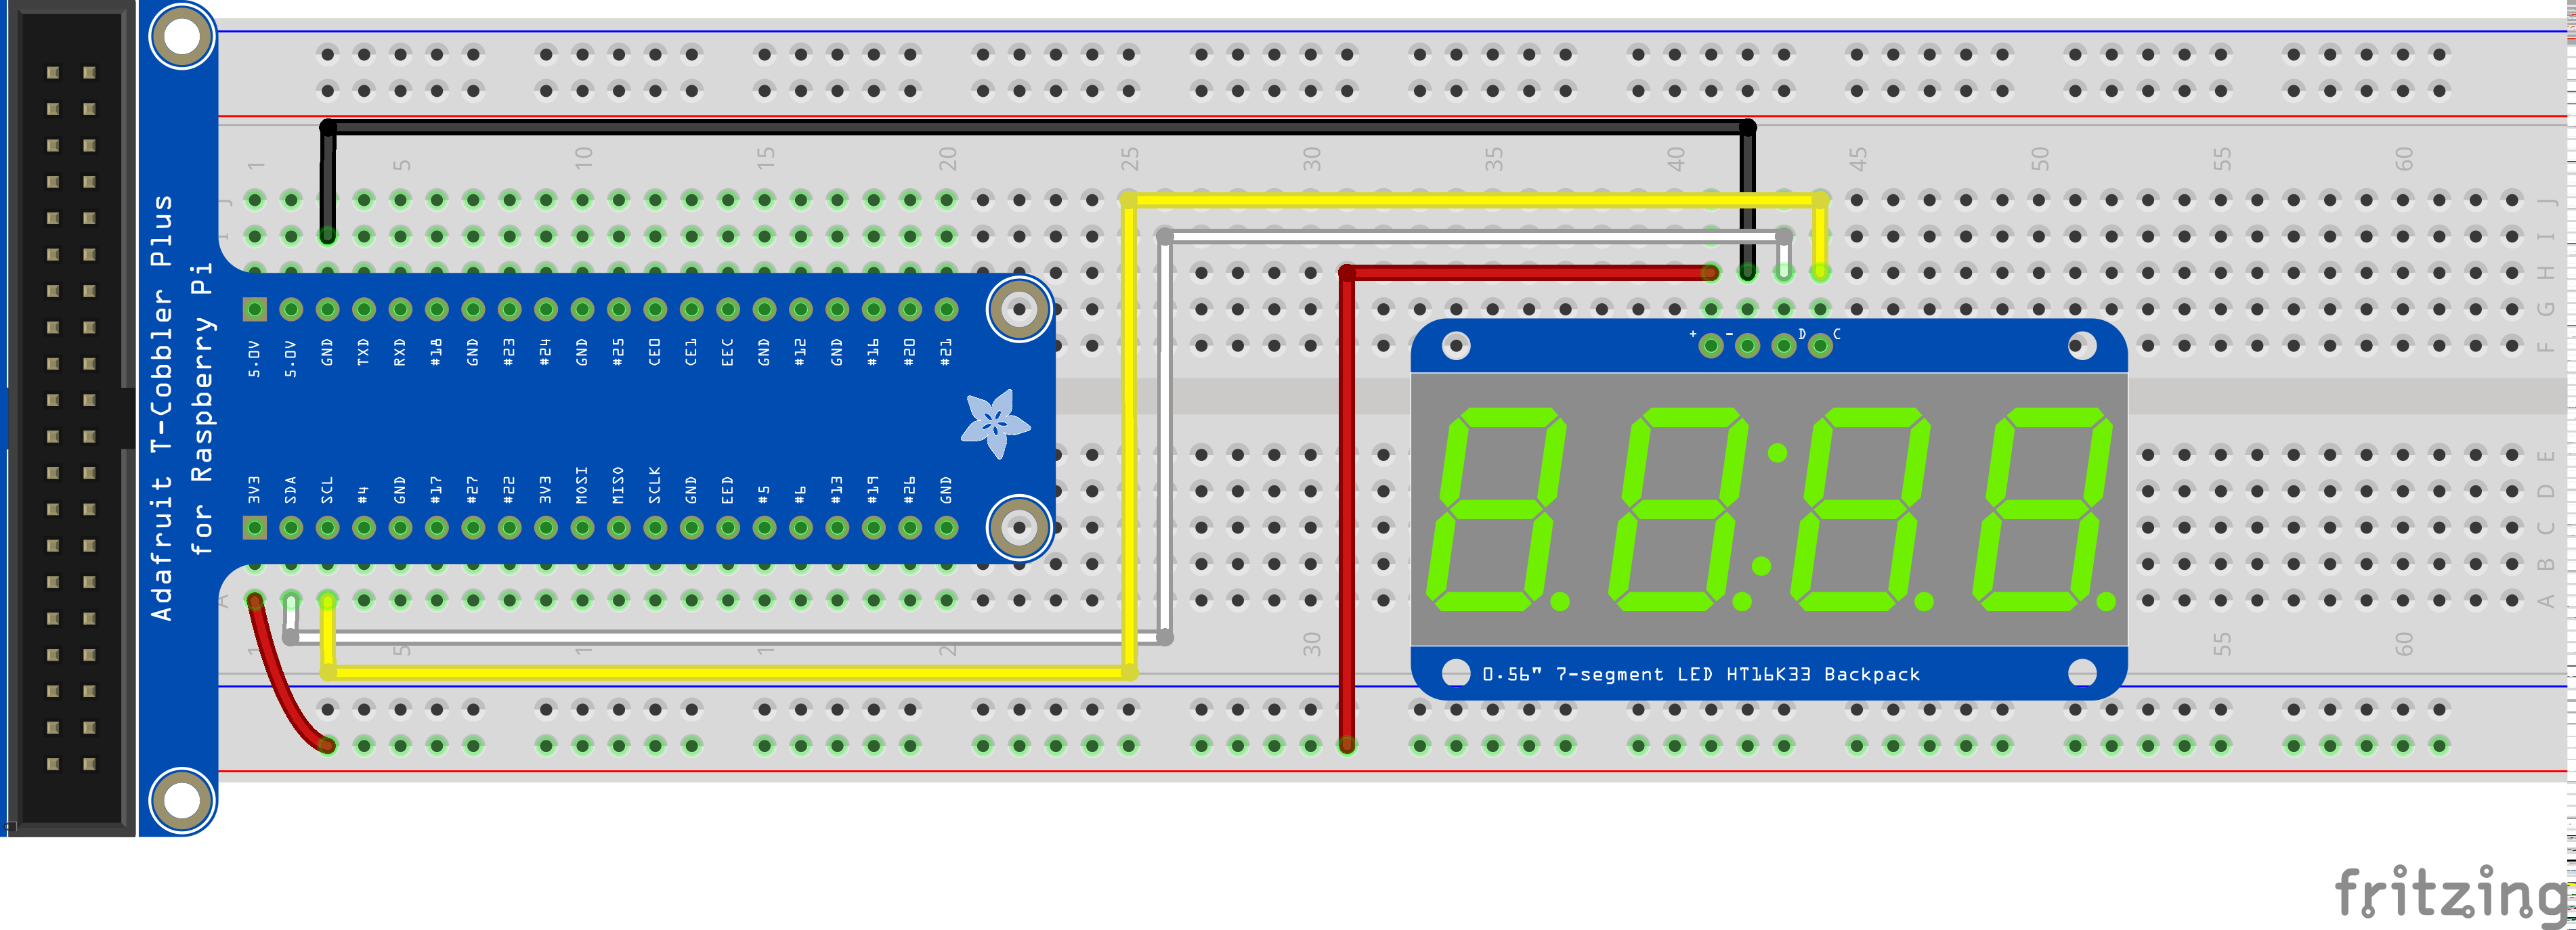

## Testing connections

Let's run the provided test program, which shows a text and a scrolling text on the 7 segment display, to be sure it is working properly.

In [ ]:
!python3 Adafruit_CircuitPython_HT16K33/examples/ht16k33_segments_7x4customchars.py

To verify that the address of our seven segment display is `0x70`, try the following command in the terminal:

In [ ]:
!i2cdetect -y 1

## Test program

Once the circuit is made as shown in the diagram and the example code works as expected, we can begin creating our own display. First, let’s import all the necessary libraries and set up the interface and class. The program below demonstrates this process:

In [ ]:
# Import all board pins.
import board
import busio

# Import the HT16K33 LED segment module.
from adafruit_ht16k33 import segments

# Create the I2C interface.
i2c = busio.I2C(board.SCL, board.SDA)

# Create the LED segment class.
# This creates a 7 segment 4 character display:
display = segments.Seg7x4(i2c)

After importing the necessary libraries and creating the I<sup>2</sup>C interface and 7-segment display class, the program below will display `AbCd`:

In [ ]:
# Clear the display.
display.fill(0)

# Set the first character to 'A':
display[0] = "A"
# Set the second character to 'B':
display[1] = "B"
# Set the third character to 'C':
display[2] = "C"
# Set the fourth character to 'D':
display[3] = "D"

Notice that the colon in the middle of the 7-segment display is not turned on? We can activate it using the code below:

In [ ]:
# Clear the display.
display.fill(0)

display.colon = True

To turn it off, simply set the value to `False`.

In [ ]:
display.colon = False

## Exercise

Write a program that does the following:

* Write a function `writeDec` which outputs a decimal value. <br>
    *Count from 0000 to 1000 in decimal, with no delay*

* Write a function `writeHex` which outputs a hexadecimal value. <br>
    *Count from 0000 to 1000 in hexadecimal (which is 4096 in decimal), with no delay*



<div class="alert alert-block alert-info">
    
**Note**: You can use `//` and `%` to extract a single digit from a number.  The following code demonstrates how to retrieve the $i$-th number (counted from 0, starting on the right) of the number in num. You can choose whether or not to use it.
    
```python
def get_digit(i, num):
    return (num // 10 ** i) % 10

num = 12345
for i in range(0, 5):
    print("get_digit(", i, ", 12345) =", get_digit(i, num))
```

</div>

In [ ]:
# Your code here